In [1]:
import pandas as pd

# Load the Iris dataset
file_path = 'iris.csv'
iris_data = pd.read_csv('iris.csv')

In [2]:
# Display the first few rows of the dataset to understand its structure
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check for missing values
missing_values = iris_data.isnull().sum()

In [4]:
# Check for any inconsistencies in the 'species' column
unique_species = iris_data['species'].unique()

missing_values, unique_species

(sepal_length    0
 sepal_width     0
 petal_length    0
 petal_width     0
 species         0
 dtype: int64,
 array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object))

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

C:\Users\Ehtisham Ijaz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


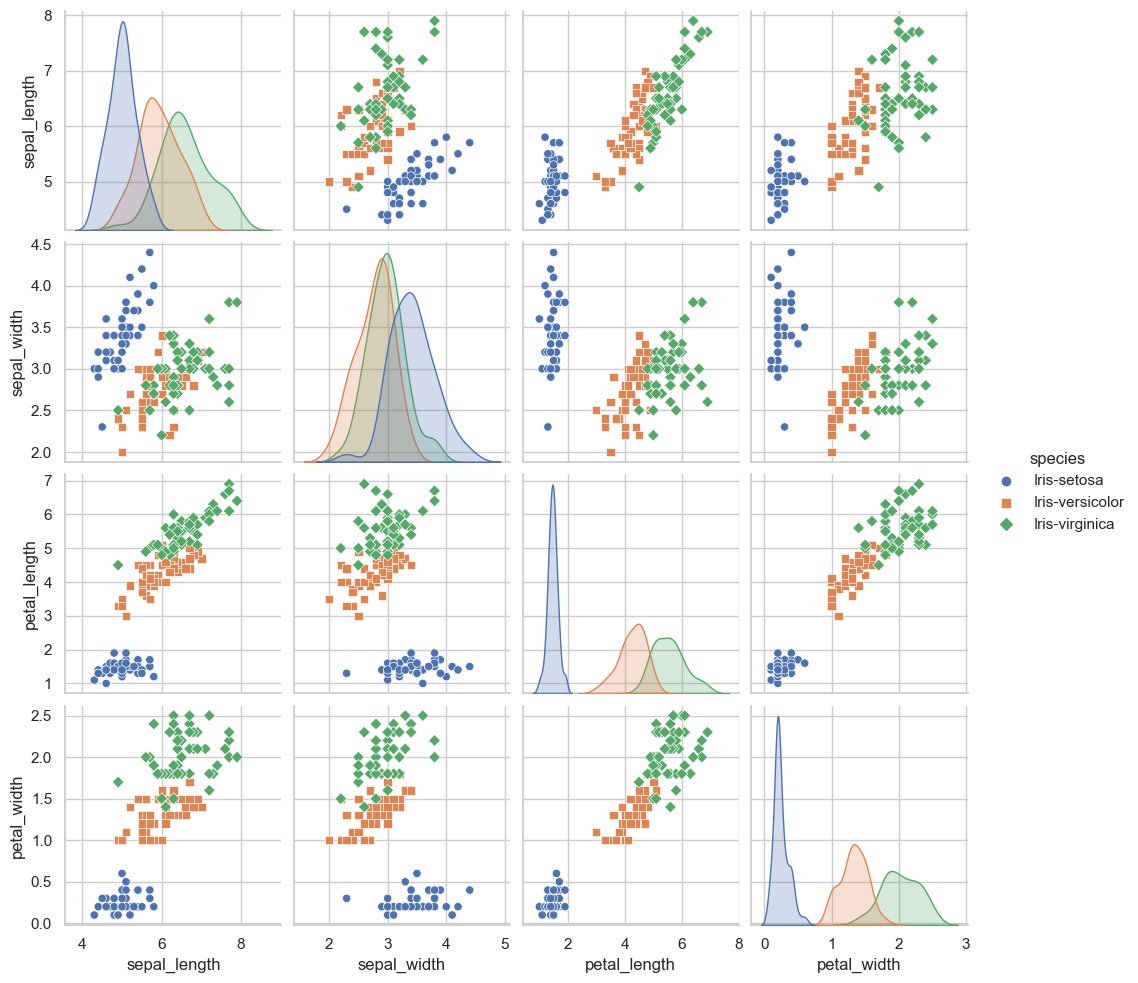

In [7]:
# Pairplot to visualize the relationship between features for each species
pair_plot = sns.pairplot(iris_data, hue="species", markers=["o", "s", "D"])
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [9]:
# Encoding the categorical variable 'species' into numerical form
label_encoder = LabelEncoder()
iris_data['species_encoded'] = label_encoder.fit_transform(iris_data['species'])

In [10]:
# Splitting the dataset into features (X) and target variable (y)
X = iris_data.drop(['species', 'species_encoded'], axis=1)
y = iris_data['species_encoded']

In [11]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Checking the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [14]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)

In [15]:
# Train the model on the training set
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
# Predictions on the test set
y_pred = knn_model.predict(X_test)

In [17]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

accuracy, class_report


(1.0,
 '                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        10\nIris-versicolor       1.00      1.00      1.00         9\n Iris-virginica       1.00      1.00      1.00        11\n\n       accuracy                           1.00        30\n      macro avg       1.00      1.00      1.00        30\n   weighted avg       1.00      1.00      1.00        30\n')

In [18]:
import pandas as pd

# Creating a DataFrame for the accuracy report
accuracy_report = pd.DataFrame(classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)).T

In [19]:
# Rounding the values for better readability
accuracy_report = accuracy_report.round(2)

In [20]:
# Displaying the report as a DataFrame
accuracy_report

,precision,recall,f1-score,support
Iris-setosa,1.0,1.0,1.0,10.0
Iris-versicolor,1.0,1.0,1.0,9.0
Iris-virginica,1.0,1.0,1.0,11.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,30.0
weighted avg,1.0,1.0,1.0,30.0
